# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [263]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
2119 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 2119
Submissions graded.


### Dataset

In [264]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [265]:
# Filter by institution
specific_institutions = ['Universitetet i Oslo (UiO)'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [266]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [267]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [268]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1865 student submissions.



### Institutions

Institution
NTNU    846
UiB     332
UiS     332
UiO     214
HiOf     95
HVL      43
Name: count, dtype: int64


<Axes: ylabel='count'>

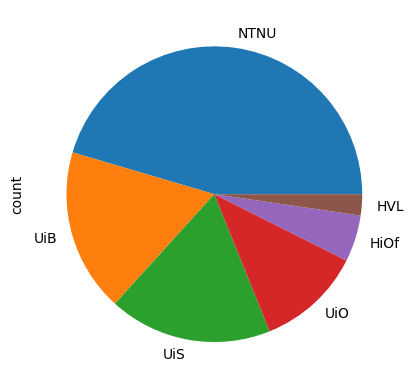

In [269]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     458
2023     398
2022     367
2021     136
2019      86
2020      81
2018      39
2017      30
2015      23
2014      22
2016      14
2012      10
2005       9
Annet      8
2010       5
2011       4
2007       4
2009       3
2006       3
2008       2
Name: count, dtype: int64


<Axes: ylabel='count'>

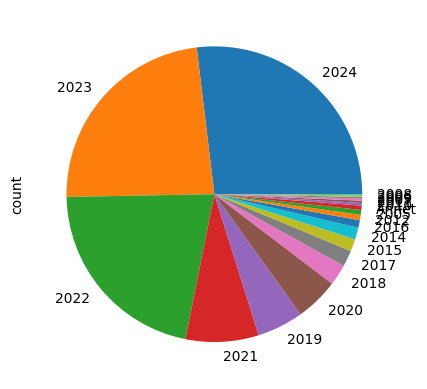

In [270]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    1110
f     622
      133
Name: count, dtype: int64
Gender
m    0.595174
f    0.333512
     0.071314
Name: proportion, dtype: float64


<Axes: ylabel='count'>

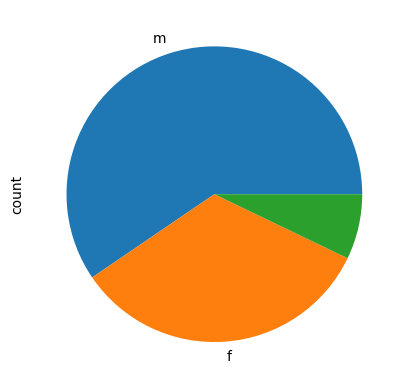

In [271]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [272]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

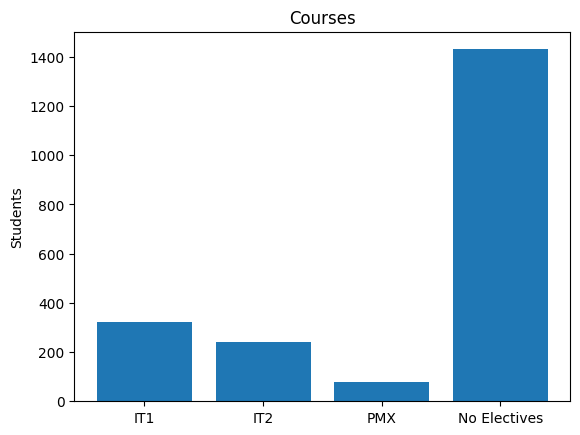

In [273]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

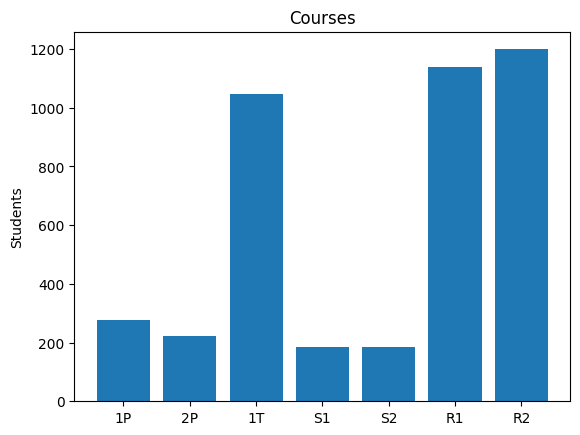

In [274]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    1444
Ja      416
Name: count, dtype: int64
OutsideExperience
Nei    0.776344
Ja     0.223656
Name: proportion, dtype: float64


<Axes: ylabel='count'>

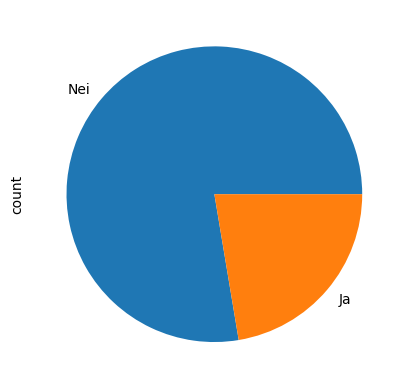

In [275]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [276]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 22.944
Standard deviation: 16.442


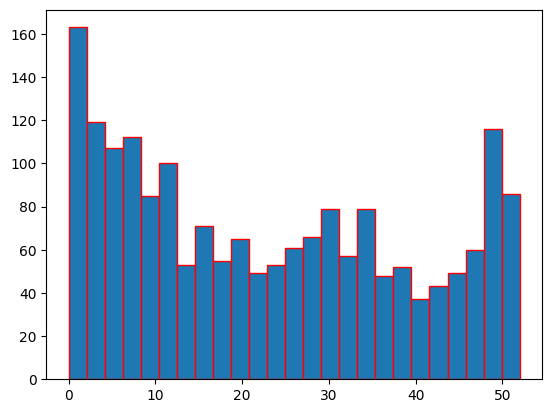

In [277]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

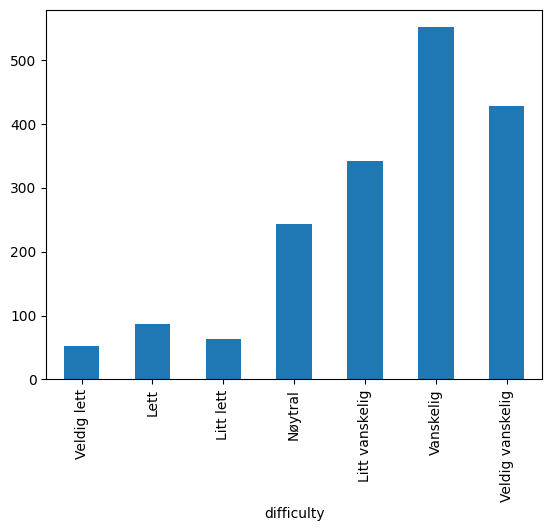

In [278]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [279]:
def compare_distributions(x, y, x_label, y_label):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, 52])
    #plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

N students in 2023 and 2024: 856
Mean of 2023 and 2024: 29.029
Standard deviation of 2023 and 2024: 15.461

N students in before 2023: 1009
Mean of before 2023: 17.782
Standard deviation of before 2023: 15.46


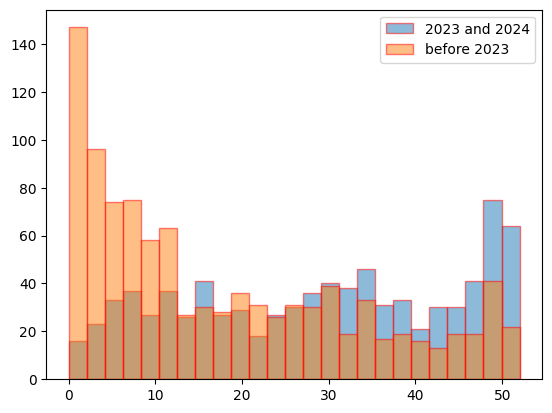

In [280]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [281]:
threshold = 45
x = df[df['Total'] > threshold]
n = len(x)

print(f'Number of students with a score over {threshold}: {n}')

Number of students with a score over 45: 272


### Gender

N students in women: 622
Mean of women: 16.774
Standard deviation of women: 14.725

N students in men: 1110
Mean of men: 26.244
Standard deviation of men: 16.4


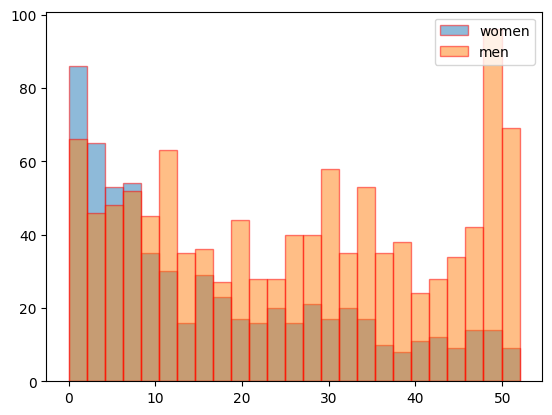

In [282]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [283]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [284]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       53.79 %
Booleans        62.44 %
Variables       52.54 %
Conditionals    57.47 %
Loops           29.44 %
Lists           33.40 %
Functions       21.86 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [285]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [286]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    938
0    927
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             938
Jeg vet ikke    623
str             120
float            95
list             47
bool             34
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    943
0    922
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           943
Jeg vet ikke    628
int             127
str             100
bool             43
list             11
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    1038
1     827
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             827
Jeg vet ikke    758
int              85
float            81
bool             73
list             21
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1305
0     560
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            1305
Jeg vet ikke  

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [287]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    1531
0     334
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            1531
I don't know     210
12.0              22
6.0               12
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [288]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1288
0     577
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1288
I don't know     303
13.0               9
12.23              5
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [289]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1268
1     597
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        597
I don't know    450
246.0           170
123.0            11
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [290]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    1181
0     684
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             1181
I don't know     371
1.0              100
3.0               40
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [291]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1286
1     579
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    683
bca             567
abc              17
'bca'            15
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [292]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    1094
0     771
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0      1094
10.0       108
30.0         4
1.0          4
15.0         2
1020.0       2
0.5          1
10.2         1
220.0        1
80.0         1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    1100
0     765
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            1100
I don't know     650
10.0              89
2.0                3
15.0               2
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [293]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    1041
0     824
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    1041
20.0     105
2.0        3
40.0       1
30.0       1
0.5        1
0.0        1
1.0        1
80.0       1
15.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    1011
0     854
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            1011
I don't know     696
20.0             130
30.0               3
1.0                3
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [294]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    1014
0     851
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    1014
10.0      94
30.0       5
29.0       1
1.0        1
0.5        1
0.0        1
15.0       1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    975
1    890
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            890
I don't know    735
10.0            210
30.0              3
2.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [295]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    961
1    904
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
 10.0    904
 20.0    168
 40.0      3
 30.0      3
 1.0       2
 10.2      1
-10.0      1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    956
0    909
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            956
I don't know    759
20.0            116
30.0              4
2.0               2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [296]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    1000
0     865
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    1000
30.0      60
10.0      54
1.0        3
0.0        1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    1044
0     821
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    1044
 20.0      36
 10.0      26
 2.0        2
 15.0       2
 3.0        1
-10.0       1
 1.0        1
 60.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    1037
0     828
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            1037
I don't know     728
20.0              29
10.0              28
60.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [297]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    996
0    869
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    996
20.0     42
10.0     30
60.0      2
0.0       2
6.0       1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    1043
1     822
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
 30.0    822
 10.0    206
 20.0     37
 0.0       2
-20.0      1
 40.0      1
 60.0      1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    1056
1     809
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            809
I don't know    755
20.0            179
10.0             75
60.0              3
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [298]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            1496
Jeg vet ikke     294
False             41
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           1644
Jeg vet ikke     135
True              55
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            1372
Jeg vet ikke     231
False            228
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1614
Jeg vet ikke     150
True              61
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1583
Jeg vet ikke     165
False             84
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           1470
Jeg vet ikke     315
True              47
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [299]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           1013
Jeg vet ikke     745
True              68
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           1391
Jeg vet ikke     379
True              57
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            969
Jeg vet ikke    496
False           358
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            1381
Jeg vet ikke     388
False             48
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            1122
Jeg vet ikke     489
False            209
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    1003
True             729
False             96
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [300]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    926
False           814
True             81
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    930
False           769
True            115
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    885
True            840
False            85
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            924
Jeg vet ikke    798
False            94
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    838
True            740
False           234
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    1081
True             588
False            145
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [301]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            1487
Jeg vet ikke     222
False            114
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           1379
Jeg vet ikke     411
True              34
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           1383
Jeg vet ikke     318
True             116
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            1071
Jeg vet ikke     406
False            337
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            1300
Jeg vet ikke     380
False            144
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           871
Jeg vet ikke    751
True            197
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [302]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1270
0     595
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1270
Jeg vet ikke     329
1                245
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [303]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    937
1    928
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               928
Jeg vet ikke    691
1               127
1 og 2           59
Ingenting        38
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [304]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    1047
0     818
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               1047
Jeg vet ikke     495
2 og 3           110
3                 56
1 og 2            48
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [305]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    1042
0     823
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          1042
Jeg vet ikke     501
1                123
1, 2 og 3         46
2                 41
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [306]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1243
1     622
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            622
I don't know    538
1.0             237
9.0             198
123456789.0     106
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [307]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1284
1     581
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            581
I don't know    556
2.0             233
8.0             176
2468.0          102
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [308]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    985
1    880
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             880
I don't know    719
0                69
102              51
2                 8
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [309]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1354
1     511
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    711
4.0             511
1.0             161
3.0             156
0.0              83
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [310]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    1381
1     484
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    1192
5.0              484
0.0               35
113.0             20
3.0               17
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [311]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    1449
1     416
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1223
9.0              416
0.0               48
-5.0              18
5.0               12
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [312]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1323
1     542
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    788
20.0            542
10.0            424
102030.0         35
60.0             10
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [313]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1329
1     536
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    832
25.0            536
15.0            378
152535.0         17
65.0             10
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [314]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    935
1    930
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    930
Jeg vet ikke    724
[15, 35, 55]     50
[5, 15, 25]      22
[10, 35, 30]     10
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    1381
1     484
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    911
[5, 35, 25]     484
[15, 35, 55]    243
[5, 15, 25]      96
[10, 35, 30]     24
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [315]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    1042
1     823
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    936
15.0            823
5.1              23
510.0            11
10.0              2
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [316]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1313
1     552
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    1146
1.0              552
2.0               53
100.0             36
0.0                2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [317]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1579
1     286
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    1125
1.0              286
12.0             161
1.2               85
2.0               60
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [318]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    1480
1     385
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1316
5.0              385
6.0               33
0.0                9
2.0                2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [319]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    1434
1     431
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    1004
10.0             431
6.0              150
9.0               74
5.0               52
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [320]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    1544
1     321
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    1379
abcxyz           315
abc                9
abcxabcyabcz       8
Abcxyz             6
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [321]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    1486
1     379
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1298
c                369
b                 38
C                 10
2                  9
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [322]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    1456
1     409
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1263
25.0             409
15.0              61
152535.0           7
65.0               6
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [323]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    1781
1      84
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    1384
80.0             135
90.0              84
21.0              22
23.0              17
Name: count, dtype: int64
